In [42]:

import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [11]:
# Date; Time; Global_active_power; Global_reactive_power; Voltage; Global_intensity; Sub_metering_1; Sub_metering_2; Sub_metering_3
dataset = pd.read_csv('household_power_consumption.txt', sep=';')
# summarize
#print(dataset.shape)
#print(dataset.head())

dataset.replace('?', np.nan, inplace=True)
# save updated dataset
dataset.to_csv('household_power_consumption.csv')


C:\Users\Frostens\AppData\Local\Temp\ipykernel_7760\4019440811.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('household_power_consumption.txt', sep=';')


In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
plt.figure()
for i in range(len(dataset.columns)):
	plt.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	plt.plot(dataset[name])
	plt.title(name, y=0)
plt.show()

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure()
for i in range(len(years)):
	# prepare subplot
	ax = plt.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset.loc[dataset.index.year == int(year)]
	# plot the active power for the year
	plt.plot(result['Global_active_power'])
	# add a title to the subplot
	plt.title(str(year), y=0, loc='left')
plt.show()

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure()
for i in range(len(months)):
	# prepare subplot
	ax = plt.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = months[i]
	# get all observations for the month
	result = dataset[(dataset.index.month == month) & (dataset.index.year == 2007)]
	# plot the active power for the month
	plt.plot(result['Global_active_power'])
	# add a title to the subplot
	plt.title(month, y=0, loc='left')
plt.show()

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
days = [x for x in range(1, 32)]
plt.figure()
for i in range(len(days)):
	# prepare subplot
	ax = plt.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = days[i]
	# get all observations for the day
	result = dataset[(dataset.index.day == day) & (dataset.index.month == 1) & (dataset.index.year == 2007)]
	# plot the active power for the day
	plt.plot(result['Global_active_power'])
	# add a title to the subplot
	plt.title(day, y=0, loc='left')
plt.show()

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# histogram plot for each variable
plt.figure()
for i in range(len(dataset.columns)):
	plt.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	plt.title(name, y=0)
plt.show()

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = [2007, 2008, 2009, 2010]
plt.figure()
for i in range(len(years)):
	# prepare subplot
	ax = plt.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[dataset.index.year == year]
	# plot the active power for the year
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	plt.title(str(year), y=0, loc='right')
plt.show()

In [ ]:
# Charger les données
data = pd.read_csv("household_power_consumption.csv", parse_dates=["datetime"], index_col="datetime")

# Afficher un aperçu

# Différenciation journalière (1440 minutes par jour)
data["Daily_diff"] = data["Global_active_power"].diff(1440)

# Différenciation annuelle (525600 minutes par an)
data["Annual_diff"] = data["Global_active_power"].diff(525600)

data["Daily_diff"].fillna(0, inplace=True)
data["Annual_diff"].fillna(0, inplace=True)


# Normaliser les colonnes sélectionnées
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[["Global_active_power", "Voltage", "Global_intensity"]])

# Ajouter les colonnes normalisées au DataFrame
data[["Global_active_power_norm", "Voltage_norm", "Global_intensity_norm"]] = scaled_data

data["hour"] = data.index.hour
data["day_of_week"] = data.index.dayofweek
data["month"] = data.index.month

# Exemple : Total des sous-comptages
data["sub_metering_total"] = (
    data["Sub_metering_1"]
    + data["Sub_metering_2"]
    + data["Sub_metering_3"]
    + data["sub_metering_4"]
)

# Sélection des colonnes pertinentes
final_data = data[["Global_active_power", "Daily_diff", "Voltage_norm", "hour", "day_of_week"]]

print(final_data[["Global_active_power", "Daily_diff", "Voltage_norm", "hour", "day_of_week"]].head(1500))

In [23]:
with open("household_power_consumption.txt", "r", encoding="utf-8") as f:
    first_line = f.readline()
    print(f"Première ligne du fichier : {first_line}")


Première ligne du fichier : Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3



In [44]:
# Date; Time; Global_active_power; Global_reactive_power; Voltage; Global_intensity; Sub_metering_1; Sub_metering_2; Sub_metering_3
df = pd.read_csv('household_power_consumption.txt', sep=';', na_values=['?'], parse_dates=[[0, 1]], dayfirst=True)
df.rename(columns={'Date_Time': 'datetime'}, inplace=True)
df.set_index('datetime', inplace=True)
#print("Aperçu après conversion datetime :")
#print(df.head())

df_hourly = df.resample('h').mean()

#print("\nDonnées agrégées par heure :")
#print(df_hourly.head())
df_hourly.interpolate(method='time', inplace=True)

df_hourly['hour'] = df_hourly.index.hour
df_hourly['day_of_week'] = df_hourly.index.dayofweek  # 0 = lundi, 6 = dimanche
df_hourly['day'] = df_hourly.index.day
df_hourly['month'] = df_hourly.index.month

df_hourly['lag1_Global_active_power'] = df_hourly['Global_active_power'].shift(1)
df_hourly['lag2_Global_active_power'] = df_hourly['Global_active_power'].shift(2)

df_hourly.dropna(inplace=True)

df_hourly['target'] = df_hourly['Global_active_power'].shift(-24)
df_hourly.dropna(inplace=True)

features = [
    'Global_active_power', 'Global_reactive_power', 'Voltage', 
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 
    'lag1_Global_active_power', 'lag2_Global_active_power', 
    'hour', 'day_of_week', 'day', 'month'
]

X = df_hourly[features]
y = df_hourly['target']

split_index = int(len(df_hourly) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")



C:\Users\Frostens\AppData\Local\Temp\ipykernel_7760\2392735449.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';', na_values=['?'], parse_dates=[[0, 1]], dayfirst=True)


Taille du jeu d'entraînement : (27650, 13)
Taille du jeu de test : (6913, 13)


In [ ]:
# PARAMETERS

# length of sliding window
features = 240
# length of test dataset
test_ts_len = 300
# size of LSTM hidden state
lstm_hidden_size = 24
# Optimizer learning rate
learning_rate = 0.02

training_epochs = 100

In [ ]:
def sliding_window(ts, features):
    X = []
    Y = []

    for i in range(features + 1, len(ts) + 1):
        X.append(ts[i - (features + 1):i - 1])
        Y.append([ts[i - 1]])

    return X, Y


def get_training_datasets(ts, features, test_len):
    X, Y = sliding_window(ts, features)

    X_train, Y_train, X_test, Y_test = X[0:-test_len],\
                                       Y[0:-test_len],\
                                       X[-test_len:],\
                                       Y[-test_len:]

    train_len = round(len(ts) * 0.7)

    X_train, X_val, Y_train, Y_val = X_train[0:train_len],\
                                     X_train[train_len:],\
                                     Y_train[0:train_len],\
                                     Y_train[train_len:]

    x_train = torch.tensor(data = X_train).float()
    y_train = torch.tensor(data = Y_train).float()

    x_val = torch.tensor(data = X_val).float()
    y_val = torch.tensor(data = Y_val).float()

    x_test = torch.tensor(data = X_test).float()
    y_test = torch.tensor(data = Y_test).float()

    return x_train, x_val, x_test,\
           y_train.squeeze(1), y_val.squeeze(1), y_test.squeeze(1)

In [46]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import copy

# Chargement des données
df = pd.read_csv("household_power_consumption.txt", sep=";", na_values=["?"], parse_dates=[[0,1]], dayfirst=True)
df.rename(columns={'Date_Time': 'datetime'}, inplace=True)
df.set_index('datetime', inplace=True)
df = df.resample('H').mean()  # Agrégation en fréquence horaire
df.interpolate(method='time', inplace=True)  # Remplissage des valeurs manquantes

# Sélection des colonnes utiles
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Normalisation MinMax
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# Création des séquences temporelles pour LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 24):  # On prédit à +24h
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length+24, 0])  # Prédiction du "Global_active_power"
    return np.array(X), np.array(y)

SEQ_LENGTH = 24  # On utilise les dernières 24 heures pour prédire
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Séparation en train (80%), validation (10%), test (10%)
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Conversion en tenseurs PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


C:\Users\Frostens\AppData\Local\Temp\ipykernel_7760\3469415071.py:11: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("household_power_consumption.txt", sep=";", na_values=["?"], parse_dates=[[0,1]], dayfirst=True)
C:\Users\Frostens\AppData\Local\Temp\ipykernel_7760\3469415071.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()  # Agrégation en fréquence horaire


Train: torch.Size([27632, 24, 7]), Val: torch.Size([3454, 24, 7]), Test: torch.Size([3455, 24, 7])


In [47]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # Prédiction finale

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Prendre seulement la dernière sortie
        return out

In [48]:
# Paramètres
hidden_size = 64
num_layers = 2
learning_rate = 0.001
num_epochs = 50

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialisation du modèle
model = LSTM(input_size=len(features), hidden_size=hidden_size, num_layers=num_layers).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Entraînement
best_model = None
min_val_loss = float('inf')

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward
    y_pred = model(X_train.to(device))
    loss = criterion(y_pred, y_train.to(device))

    # Backward
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val.to(device))
        val_loss = criterion(val_pred, y_val.to(device))

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    # Sauvegarde du meilleur modèle
    if val_loss.item() < min_val_loss:
        best_model = copy.deepcopy(model)
        min_val_loss = val_loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

# Utilisation du meilleur modèle
model = best_model
model.eval()


Epoch 0: Train Loss = 0.0996, Val Loss = 0.0743
Epoch 10: Train Loss = 0.0206, Val Loss = 0.0165
Epoch 20: Train Loss = 0.0204, Val Loss = 0.0127
Epoch 30: Train Loss = 0.0211, Val Loss = 0.0130
Epoch 40: Train Loss = 0.0203, Val Loss = 0.0131


LSTM(
  (lstm): LSTM(7, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

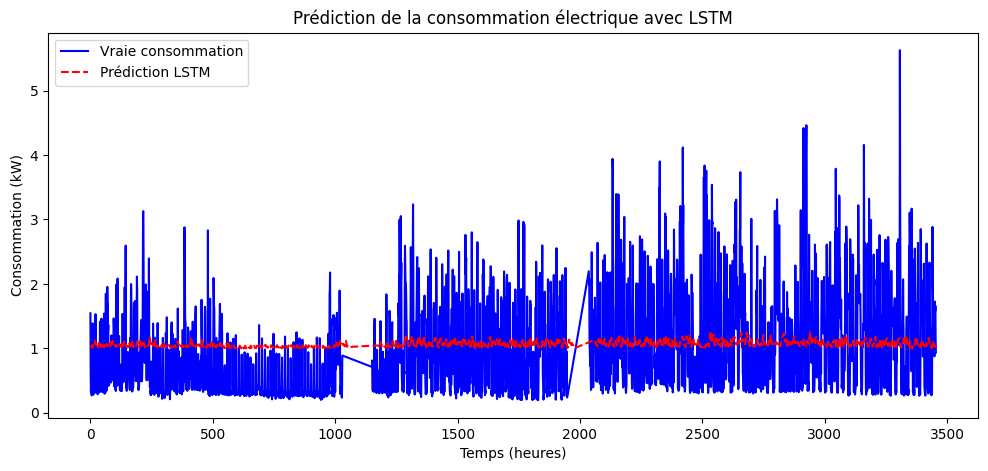

In [49]:
# Prédiction sur le test set
with torch.no_grad():
    y_pred_test = model(X_test.to(device))

# Conversion en numpy pour visualisation
y_pred_test = y_pred_test.cpu().numpy()
y_test_np = y_test.cpu().numpy()

# Re-scaling des valeurs prédites
y_pred_test = scaler.inverse_transform(np.concatenate((y_pred_test, np.zeros((y_pred_test.shape[0], len(features) - 1))), axis=1))[:, 0]
y_test_np = scaler.inverse_transform(np.concatenate((y_test_np, np.zeros((y_test_np.shape[0], len(features) - 1))), axis=1))[:, 0]

# Affichage des résultats
plt.figure(figsize=(12,5))
plt.plot(y_test_np, label="Vraie consommation", color="blue")
plt.plot(y_pred_test, label="Prédiction LSTM", color="red", linestyle="dashed")
plt.xlabel("Temps (heures)")
plt.ylabel("Consommation (kW)")
plt.title("Prédiction de la consommation électrique avec LSTM")
plt.legend()
plt.show()